In [ ]:
import os
import glob
import librosa
import numpy as np
import pandas as pd

dataset_path='/content/drive/MyDrive/RAVDEES/disgust/image1_disgust.png'


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from PIL import Image
emotions=['fear','calm','sad','happy','neutral','angry','disgust','surprise']
X = []
y = []

for emotion in emotions:
  folder_path = '/content/drive/MyDrive/RAVDEES/'+emotion
  for file in os.listdir(folder_path):
    img_original = Image.open(os.path.join(folder_path, file))
    width, height = img_original.size
    crop_width = int(0.2 * width)  # crop 20% of width on each side
    # calculate left and right crop bounds
    left = crop_width
    right = width - crop_width
    cropped_img = img_original.crop((left, 0, right, height))
    img_resize = img_original.resize((224,224))
    r, g, b, a = img_resize.split()
    rgb_img = Image.merge('RGB', (r, g, b))
    X.append(np.array(rgb_img))
    y.append(emotion)

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
from skimage import exposure

X_norm = exposure.rescale_intensity(X, out_range=(0, 1))

In [ ]:
# X_norm.write("ImageX.npy")
# y.write("Imagey.npy")

np.save("ImageX.npy",X_norm)
np.save("Imagey.npy",y)

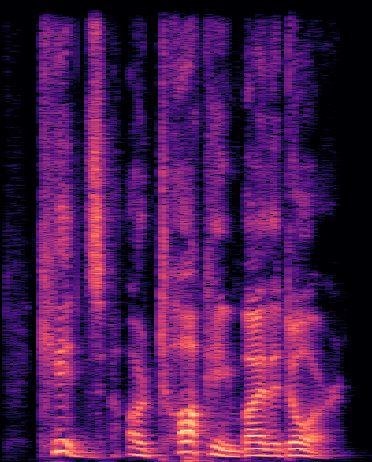

In [ ]:

# # from PIL import Image

# folder_path = '/content/drive/MyDrive/RAVDEES/angry'
# img_original = Image.open(os.path.join(folder_path, 'image_3_angry.png'))
# width, height = img_original.size
# crop_width = int(0.2 * width)  # crop 20% of width on each side
# # calculate left and right crop bounds
# left = crop_width
# right = width - crop_width
# cropped_img = img_original.crop((left, 0, right, height))
# img_resize = cropped_img.resize((224,224))
# # cropped_img = img.crop((left, top, right, bottom))
# # r, g, b, a = img.split()
# # rgb_img = Image.merge('RGB', (r, g, b))
# # rgb_img

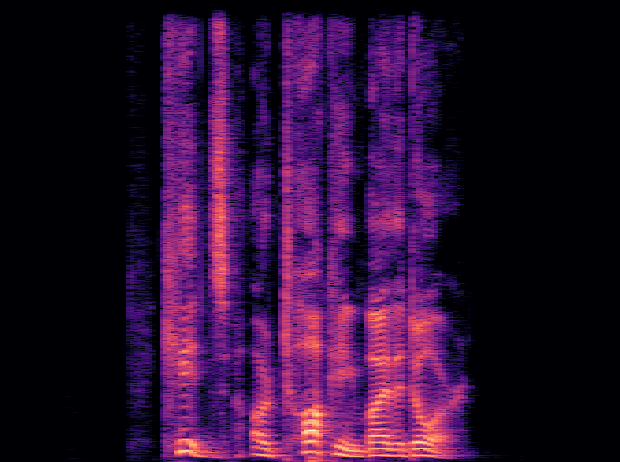

In [ ]:
img_original

In [ ]:
X_norm.shape, y.shape

((7032, 224, 224, 3), (7032,))

In [ ]:
X_norm[1]

array([[[0.        , 0.        , 0.00392157],
        [0.        , 0.        , 0.00784314],
        [0.        , 0.        , 0.00784314],
        ...,
        [0.        , 0.        , 0.00784314],
        [0.        , 0.        , 0.00784314],
        [0.        , 0.        , 0.00784314]],

       [[0.        , 0.        , 0.00784314],
        [0.        , 0.        , 0.01568627],
        [0.        , 0.        , 0.01568627],
        ...,
        [0.        , 0.        , 0.01568627],
        [0.        , 0.        , 0.01568627],
        [0.        , 0.        , 0.01568627]],

       [[0.        , 0.        , 0.00784314],
        [0.        , 0.        , 0.01568627],
        [0.        , 0.        , 0.01568627],
        ...,
        [0.        , 0.        , 0.01568627],
        [0.        , 0.        , 0.01568627],
        [0.        , 0.        , 0.01568627]],

       ...,

       [[0.        , 0.        , 0.        ],
        [0.00392157, 0.00392157, 0.02745098],
        [0.01176471, 0

In [ ]:
# #Compute the mean and standard deviation of the features in the training set

# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(X)
# X = scaler.transform(X)

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y = lb.fit_transform(y)

In [ ]:
X[1],y[1]

(array([[[ 0,  0,  1],
         [ 0,  0,  2],
         [ 0,  0,  2],
         ...,
         [ 0,  0,  2],
         [ 0,  0,  2],
         [ 0,  0,  2]],
 
        [[ 0,  0,  2],
         [ 0,  0,  4],
         [ 0,  0,  4],
         ...,
         [ 0,  0,  4],
         [ 0,  0,  4],
         [ 0,  0,  4]],
 
        [[ 0,  0,  2],
         [ 0,  0,  4],
         [ 0,  0,  4],
         ...,
         [ 0,  0,  4],
         [ 0,  0,  4],
         [ 0,  0,  4]],
 
        ...,
 
        [[ 0,  0,  0],
         [ 1,  1,  7],
         [ 3,  3, 15],
         ...,
         [ 0,  0,  4],
         [ 0,  0,  4],
         [ 0,  0,  4]],
 
        [[ 9,  5, 24],
         [18, 10, 44],
         [19, 10, 46],
         ...,
         [ 0,  0,  4],
         [ 0,  0,  4],
         [ 0,  0,  4]],
 
        [[11,  7, 29],
         [23, 10, 53],
         [27, 10, 57],
         ...,
         [ 0,  0,  4],
         [ 0,  0,  4],
         [ 0,  0,  4]]], dtype=uint8),
 3)

In [ ]:
# Importing necessary libraries
from keras.applications.vgg16 import VGG16
#from keras.applications.vgg19 import VGG19
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Input
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow import keras

# Splitting data into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X_norm, y, test_size=0.2, random_state=42, shuffle=True)

# Loading pre-trained VGG16 model and adding new layers
input_shape = (224, 224, 3)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(units = 8, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# Freezing pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

opt = keras.optimizers.Adam(learning_rate=0.0001)
# Compiling and training model
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
np.shape(X_train)

(5625, 224, 224, 3)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Define the early stopping criteria
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min', restore_best_weights=True)

history = model.fit(X_train, y_train, batch_size=128, epochs=300, validation_data=(X_val, y_val), callbacks=[early_stop])

Epoch 1/300
38/38 [==============================] - 62s 1s/step - loss: 2.1393 - accuracy: 0.1400 - val_loss: 2.0933 - val_accuracy: 0.1682
Epoch 2/300
38/38 [==============================] - 24s 623ms/step - loss: 2.0664 - accuracy: 0.1970 - val_loss: 2.0530 - val_accuracy: 0.1872
Epoch 3/300
38/38 [==============================] - 24s 637ms/step - loss: 2.0468 - accuracy: 0.1995 - val_loss: 2.0366 - val_accuracy: 0.1906
Epoch 4/300
38/38 [==============================] - 25s 652ms/step - loss: 2.0353 - accuracy: 0.2119 - val_loss: 2.0265 - val_accuracy: 0.2022
Epoch 5/300
38/38 [==============================] - 26s 687ms/step - loss: 2.0246 - accuracy: 0.2189 - val_loss: 2.0157 - val_accuracy: 0.2229
Epoch 6/300
38/38 [==============================] - 25s 662ms/step - loss: 2.0140 - accuracy: 0.2243 - val_loss: 2.0068 - val_accuracy: 0.2370
Epoch 7/300
38/38 [==============================] - 25s 660ms/step - loss: 2.0039 - accuracy: 0.2579 - val_loss: 1.9982 - val_accuracy: 0.

In [ ]:
# Evaluating model
loss, accuracy = model.evaluate(X_val, y_val)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

9/9 [==============================] - 1s 123ms/step - loss: 1.4943 - accuracy: 0.4722
Test loss: 1.494328498840332
Test accuracy: 0.4722222089767456
